In [13]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
%cd /glade/scratch/gmarques/OM4_025
%ls

/glade/scratch/gmarques/OM4_025
20080101.ocean_Agulhas_section.nc.0033
20080101.ocean_Agulhas_section.nc.0064
20080101.ocean_Agulhas_section.nc.0096
20080101.ocean_Agulhas_section.nc.0128
20080101.ocean_Agulhas_section.nc.0160
20080101.ocean_annual.nc
20080101.ocean_annual_rho2.nc
20080101.ocean_annual_z.nc
20080101.ocean_Barents_opening.nc.0374
20080101.ocean_Barents_opening.nc.0392
20080101.ocean_Barents_opening.nc.0417
20080101.ocean_Barents_opening.nc.0446
20080101.ocean_Bering_Strait.nc.0381
20080101.ocean_daily.nc
20080101.ocean_Davis_Strait.nc.0385
20080101.ocean_Davis_Strait.nc.0386
20080101.ocean_Davis_Strait.nc.0387
20080101.ocean_Denmark_Strait.nc.0387
20080101.ocean_Denmark_Strait.nc.0388
20080101.ocean_Denmark_Strait.nc.0389
20080101.ocean_Drake_Passage.nc.0025
20080101.ocean_Drake_Passage.nc.0056
20080101.ocean_Drake_Passage.nc.0088
20080101.ocean_Drake_Passage.nc.0120
20080101.ocean_English_Channel.nc.0353
20080101.ocean_Faroe_Scotland.nc.0373
20080101.ocean_Florida_Baha

In [15]:
grid=xr.open_dataset('20090101.ocean_static.nc')
lon=grid['geolon'].values; lat=grid['geolat'].values
ds = xr.open_dataset('20090101.ocean_month.nc')
Rd_dx=ds['Rd_dx'][-1,:,:].values

lon[np.isnan(lon)]=0.0
lat[np.isnan(lat)]=0.0
#Rd_dx[np.isnan(lon)]=0.0; Rd_dx[np.isnan(lat)]=0.0

In [16]:
print(Rd_dx.shape)
print(lon.shape)
print(lat.shape)

(1080, 1440)
(1080, 1440)
(1080, 1440)


In [17]:
#print(ds)

In [26]:
np.max(lon)

59.99949

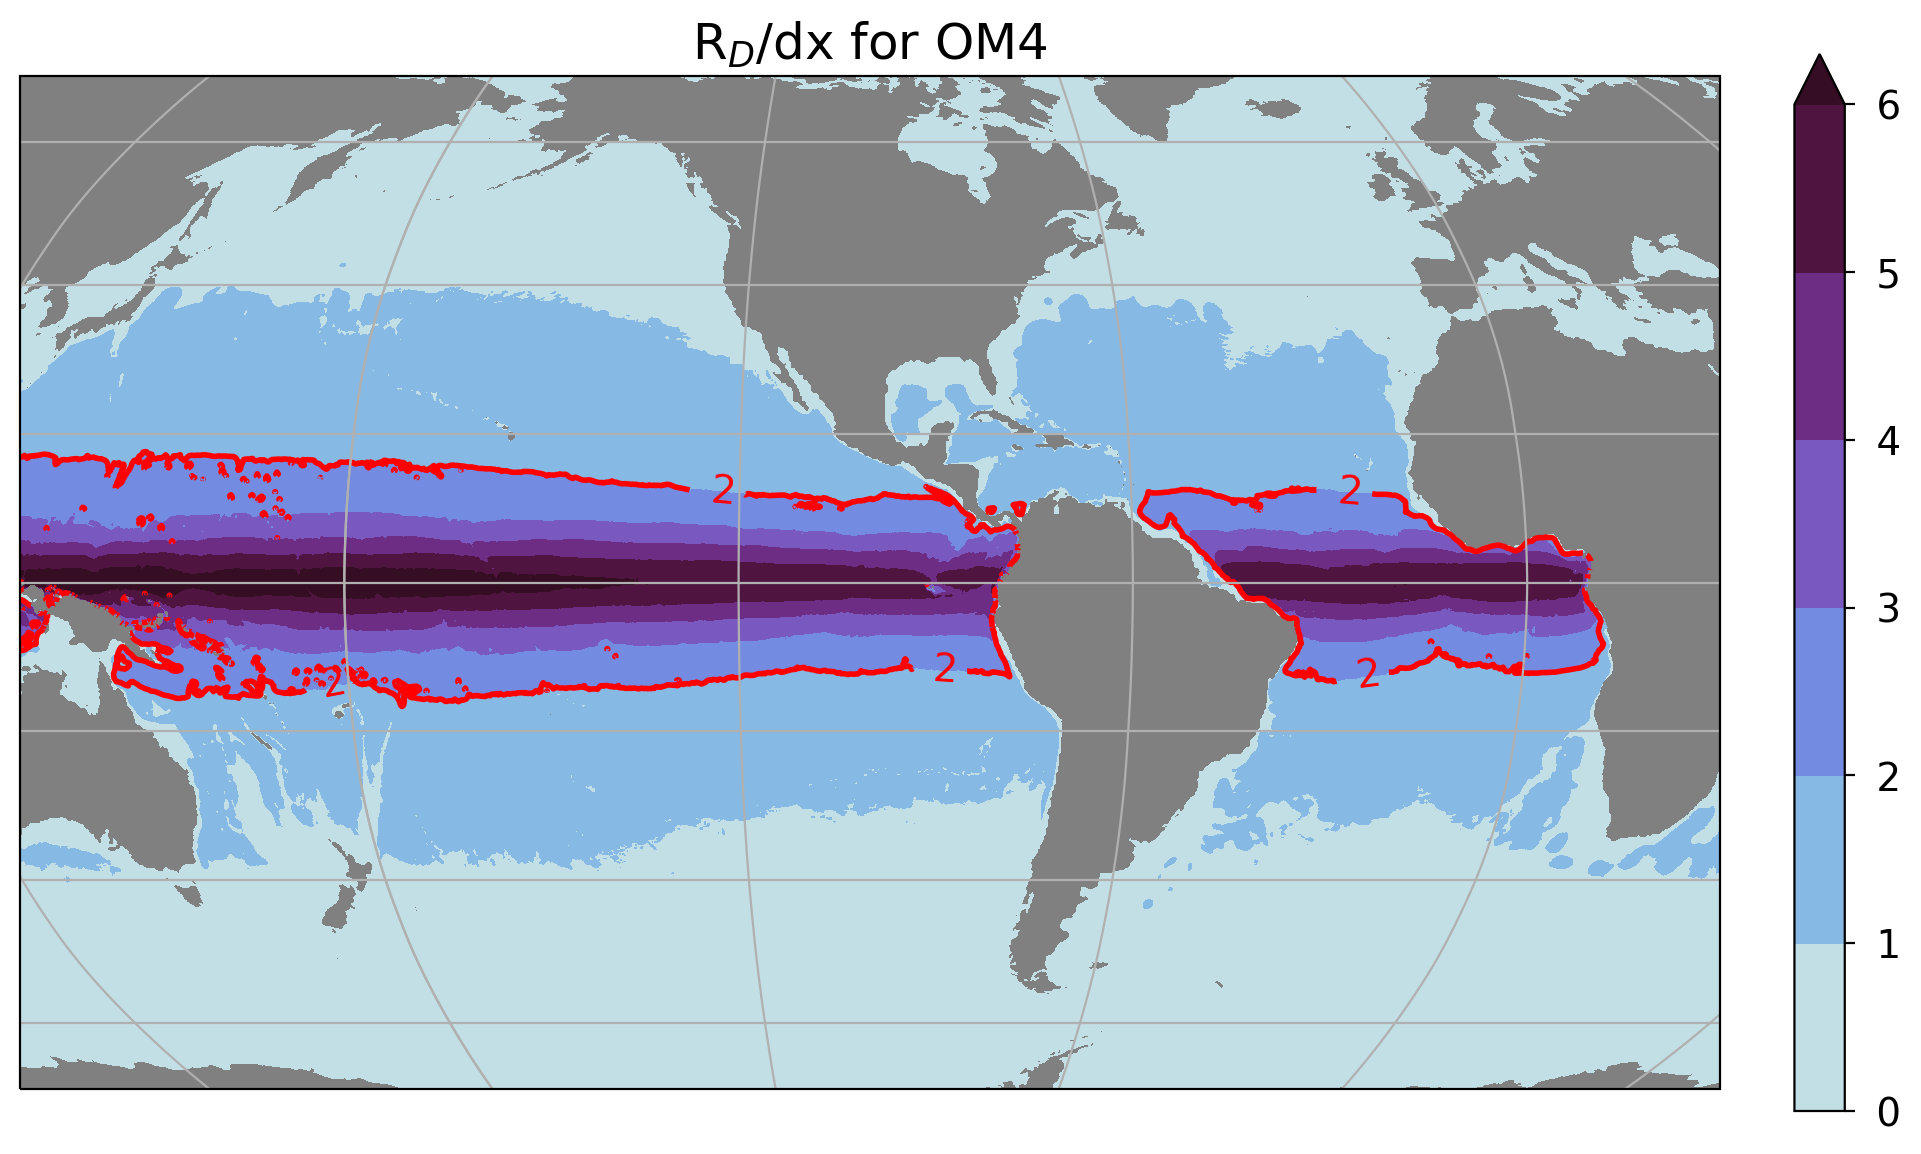

In [33]:
fig = plt.figure(figsize=(12, 7), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100)) #-140 is default
ax.set_extent([-400,-40,-70, 70],ccrs.PlateCarree())

levels=np.linspace(0,6,7)
plt.contourf(lon,lat,Rd_dx,levels=levels,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,extend='max');
#plt.ylim(-70, 70)

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%2.1d'); cbar.ax.tick_params(labelsize=14);
CS=plt.contour(lon, lat,Rd_dx,levels = [2],transform=ccrs.PlateCarree(),
                 colors=('r',),linestyles=('-',),linewidths=(2,))
ax.clabel(CS, fmt = '%2.1d', colors = 'r', fontsize=14)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('R$_D$/dx for OM4',fontsize=18) #positive into ocean
ax.background_patch.set_facecolor('grey')

In [14]:
sum(lon)

<xarray.DataArray 'geolon' (xh: 1440)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03